<a href="https://colab.research.google.com/github/jrdeborja/thesis-supp.-data/blob/main/qsar_ml_de_borja_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR-ML**
- authored by Joshua R. de Borja

# **Feature Engineering**

- separation of the whole dataset into train, test, and validation datasets to be used for machine learning model building

**Dataset separation**

- ROCK1 (CHEMBL3231) dataset
- -----
- (HCV) dataset containing the following:
- NS5B POLYMERASE (CHEMBL5375)
- NS3 PROTEASE (CHEMBL1293269)  
- NS3/NS4A PROTEASE (CHEMBL2095231)  

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Mordred descriptors (1D, 2D and 3D) and RDkit (MACCS keys)
df = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/final_dataset_for_ml.csv')

<ipython-input-2-b142d5be964c>:5: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,150,151,159,160,161,162,163,164,165,166,167,168,177,178,186,187,195,196,204,205,213,214,222,223,231,232,240,241,269,270,271,272,273,274,275,276,277,357,358,366,367,375,376,377,378,379,380,381,382,383,384,393,394,402,403,411,412,420,421,429,430,438,439,447,448,456,457,464,465,472,473,480,481,482,483,484,485,486,487,488,496,497,504,505,512,513,520,521,528,529,536,537,544,545,552,553,560,561,568,569,576,577,578,579,580,581,582,583,584,592,593,600,601,608,609,616,617,624,625,632,633,640,641,648,649,867,875,881,882,883,891,897,898,1110,1115,1133,1189,1194,1212,1581,1582,1804,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/final_dataset_for_ml.csv')


In [ ]:
df

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
0,2102,CHEMBL210297,O=C(O)c1ccc2c(c1)nc(-c1ccc(OCc3cc(N4CCCC4=O)cc...,'=',83368118.46,CHEMBL3045038,8.336812e-02,1.079000,inactive,36.871660,...,1,1,1,0,1,1,1,1,1,0
1,3101,CHEMBL2296935,CC(=O)NC(=O)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3n...,'=',71449632.61,CHEMBL3045038,7.144963e-02,1.146000,inactive,36.423773,...,1,1,1,1,1,1,1,1,1,0
2,4101,CHEMBL376688,CN(C)C(=O)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3nc4...,'=',66680676.92,CHEMBL3045038,6.668068e-02,1.176000,inactive,34.900170,...,1,1,1,1,1,1,1,1,1,0
3,5101,CHEMBL374567,CC(=O)N(C)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3nc4...,'=',62517269.28,CHEMBL3045038,6.251727e-02,1.204000,inactive,35.676226,...,1,1,1,1,1,1,1,1,1,0
4,6101,CHEMBL411712,O=C(O)c1ccc2c(c1)nc(-c1ccc(OCc3cc(C(=O)N4CCCCC...,'=',55590425.73,CHEMBL3045038,5.559043e-02,1.255000,inactive,38.285874,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,966,CHEMBL4763198,COc1cccc([C@@H](C)NC(=O)c2ccc3c(c2)C(C)Oc2cncc...,'=',0.49,CHEMBL4665758,4.900000e-10,9.309804,active,22.005839,...,1,1,1,1,1,1,1,1,1,0
3459,967,CHEMBL3949136,COc1cc(C(=O)NCc2cccc(C(=O)NC3CCN(C)CC3)c2)ccc1...,'=',0.43,CHEMBL3886981,4.300000e-10,9.366532,active,25.622253,...,1,1,1,1,1,1,1,1,1,0
3460,968,CHEMBL3961538,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CN(C)CC4)...,'=',0.39,CHEMBL3886981,3.900000e-10,9.408935,active,28.410240,...,1,1,1,1,1,1,1,1,1,0
3461,969,CHEMBL3902471,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CNCC4)c2)...,'=',0.26,CHEMBL3886981,2.600000e-10,9.585027,active,27.593743,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# coerce all objects to be NaN
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, object) else x)

In [ ]:
pd.isnull(df).sum().sum()

1318504

In [ ]:
print(df.shape)

(3463, 2002)


In [ ]:
# shuffle the observations/rows with a fixed seed
df = df.sample(frac=1, random_state=42)

In [ ]:
df

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
3399,906,NaN,NaN,NaN,3.26,NaN,3.260000e-09,8.486782,NaN,19.258292,...,1,1,1,1,1,1,1,1,1,0
410,4301,NaN,NaN,NaN,17000.00,NaN,1.700000e-05,4.769551,NaN,34.602113,...,1,1,1,1,1,1,1,1,1,0
3416,923,NaN,NaN,NaN,2.22,NaN,2.220000e-09,8.653647,NaN,18.660575,...,1,1,1,1,1,1,1,1,1,0
1578,745,NaN,NaN,NaN,110.00,NaN,1.100000e-07,6.958607,NaN,15.274871,...,1,0,1,0,1,1,1,1,1,0
1283,450,NaN,NaN,NaN,500.00,NaN,5.000000e-07,6.301030,NaN,51.400587,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,262,NaN,NaN,NaN,1100.00,NaN,1.100000e-06,5.958607,NaN,42.678161,...,1,1,1,1,1,1,1,1,1,0
1130,297,NaN,NaN,NaN,1000.00,NaN,1.000000e-06,6.000000,NaN,22.127159,...,1,1,1,0,1,1,1,1,1,0
1294,461,NaN,NaN,NaN,490.00,NaN,4.900000e-07,6.309804,NaN,50.802870,...,1,1,1,1,1,1,1,1,1,0
860,25,NaN,NaN,NaN,3420.00,NaN,3.420000e-06,5.465974,NaN,28.823938,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
pd.isnull(df).sum().sum()

1318504

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean', keep_empty_features=True)
df_imp = imp_mean.fit_transform(df)

In [ ]:
df_imp = pd.DataFrame(df_imp, columns=df.columns, index=df.index)

In [ ]:
df_imp

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
3399,906.0,0.0,0.0,0.0,3.26,0.0,3.260000e-09,8.486782,0.0,19.258292,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
410,4301.0,0.0,0.0,0.0,17000.00,0.0,1.700000e-05,4.769551,0.0,34.602113,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3416,923.0,0.0,0.0,0.0,2.22,0.0,2.220000e-09,8.653647,0.0,18.660575,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1578,745.0,0.0,0.0,0.0,110.00,0.0,1.100000e-07,6.958607,0.0,15.274871,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1283,450.0,0.0,0.0,0.0,500.00,0.0,5.000000e-07,6.301030,0.0,51.400587,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,262.0,0.0,0.0,0.0,1100.00,0.0,1.100000e-06,5.958607,0.0,42.678161,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1130,297.0,0.0,0.0,0.0,1000.00,0.0,1.000000e-06,6.000000,0.0,22.127159,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1294,461.0,0.0,0.0,0.0,490.00,0.0,4.900000e-07,6.309804,0.0,50.802870,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
860,25.0,0.0,0.0,0.0,3420.00,0.0,3.420000e-06,5.465974,0.0,28.823938,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
print(pd.isnull(df_imp).sum().sum())

0


In [ ]:
df_md_fp = df_imp.drop(df_imp.loc[:, 'Unnamed: 0':'Bioactivity.Class'].columns, axis=1)

df_md = df_md_fp.drop(df_md_fp.loc[:, '0':'166'].columns, axis=1)
df_fp = df_imp.drop(df_imp.loc[:, 'Unnamed: 0':'0'].columns, axis=1)

df_pIC50 = df_imp['pIC50']

In [ ]:
print(df_md_fp.shape)
print(df_md.shape)
print(df_fp.shape)
print(df_pIC50.shape)

(3463, 1993)
(3463, 1826)
(3463, 166)
(3463,)


In [ ]:
pd.isnull(df_md).sum().sum()

0

## **Correlation method**

- molecular descriptors

In [ ]:
def remove_correlated_features(descriptors):
    # Calculate correlation on molecular descriptors
    correlated_matrix = descriptors.corr().abs()

    # Upper triangle of correlation matrix
    upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(np.bool))

    # Identify columns that have above 0.8 values of correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.8)]
    print(to_drop)
    descriptors_correlated_dropped = descriptors.drop(columns=to_drop, axis=1)
    return descriptors_correlated_dropped

In [ ]:
df_md_new = remove_correlated_features(df_md)
df_md_new

<ipython-input-17-3bd9b7d4fe69>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlated_matrix.where(np.triu(np.ones(correlated_matrix.shape),k=1).astype(np.bool))


['ABCGG', 'SpAbs_A', 'SpDiam_A', 'SpAD_A', 'LogEE_A', 'VE2_A', 'VE3_A', 'VR2_A', 'VR3_A', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nO', 'nX', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are', 'ATS7are', 'ATS8are', 'ATS0p', 'ATS1p', 'ATS2p', 'ATS3p', 'ATS4p', 'ATS5p', 'ATS6p', 'A

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,SRW05,WPath
3399,19.258292,0.0,0.0,2.392561,1.287785,4.237473,221.809125,17.0,0.0,0.0,...,0.041291,0.038725,0.028257,0.020287,0.014022,0.008063,0.011085,0.007718,2.397895,1.653000e+03
410,34.602113,2.0,0.0,2.488004,1.269476,4.747245,5670.605702,24.0,0.0,0.0,...,0.050794,0.040139,0.032171,0.014493,0.015054,0.011918,0.006976,0.009407,3.044522,8.776000e+03
3416,18.660575,0.0,0.0,2.389200,1.278399,4.199987,209.411702,17.0,0.0,0.0,...,0.041865,0.039861,0.033869,0.018738,0.011718,0.012145,0.010488,0.006785,2.397895,1.492000e+03
1578,15.274871,1.0,0.0,2.354705,1.204922,3.731437,239.840201,6.0,0.0,0.0,...,0.042411,0.042051,0.024306,0.020408,0.016177,0.012314,0.010625,0.008264,0.000000,1.022000e+03
1283,51.400587,2.0,0.0,2.455648,1.239133,5.000529,4676.543112,12.0,0.0,0.0,...,0.045307,0.043031,0.023553,0.016635,0.016112,0.010792,0.008759,0.007857,3.044522,2.432300e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,42.678161,0.0,0.0,2.664129,1.262005,3.967591,31644.028778,18.0,0.0,2.0,...,0.070322,0.056173,0.029079,0.022334,0.016243,0.012712,0.009849,0.008226,3.044522,1.185600e+04
1130,22.127159,0.0,0.0,2.331979,1.302354,4.934532,201.680291,18.0,0.0,0.0,...,0.034226,0.042042,0.021007,0.015594,0.013363,0.007596,0.007989,0.006943,0.000000,2.578000e+03
1294,50.802870,2.0,0.0,2.455999,1.228707,4.984673,4888.975090,12.0,0.0,0.0,...,0.046296,0.042144,0.024171,0.016959,0.015426,0.010353,0.008872,0.007671,2.397895,2.384400e+04
860,28.823938,2.0,0.0,2.496757,1.277973,4.373193,68002.660421,20.0,0.0,0.0,...,0.056896,0.050737,0.026789,0.019181,0.015494,0.009816,0.009878,0.006275,3.433987,1.860000e+10


## **Variance Threshold**

- molecular descriptors

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

In [ ]:
df_md_new = remove_low_variance(df_md_new, threshold=0.1)
df_md_new

,ABC,nAcid,nBase,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,nN,nS,...,nAHRing,n6AHRing,nFRing,n9FRing,n10FRing,nFaRing,nFARing,SLogP,SRW05,WPath
3399,19.258292,0.0,0.0,4.237473,221.809125,17.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.80780,2.397895,1.653000e+03
410,34.602113,2.0,0.0,4.747245,5670.605702,24.0,0.0,0.0,7.0,0.0,...,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.43940,3.044522,8.776000e+03
3416,18.660575,0.0,0.0,4.199987,209.411702,17.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.41240,2.397895,1.492000e+03
1578,15.274871,1.0,0.0,3.731437,239.840201,6.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.62738,0.000000,1.022000e+03
1283,51.400587,2.0,0.0,5.000529,4676.543112,12.0,0.0,0.0,8.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.55510,3.044522,2.432300e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,42.678161,0.0,0.0,3.967591,31644.028778,18.0,0.0,2.0,6.0,0.0,...,2.0,0.0,2.0,1.0,1.0,0.0,2.0,6.67160,3.044522,1.185600e+04
1130,22.127159,0.0,0.0,4.934532,201.680291,18.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00220,0.000000,2.578000e+03
1294,50.802870,2.0,0.0,4.984673,4888.975090,12.0,0.0,0.0,8.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.16760,2.397895,2.384400e+04
860,28.823938,2.0,0.0,4.373193,68002.660421,20.0,0.0,0.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.84182,3.433987,1.860000e+10


In [ ]:
# concatenate the new molecular descriptors and maccs keys
df_md_fp_new = pd.concat([df_md_new, df_fp], axis=1)

In [ ]:
df_md_fp_new

,ABC,nAcid,nBase,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,nN,nS,...,157,158,159,160,161,162,163,164,165,166
3399,19.258292,0.0,0.0,4.237473,221.809125,17.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
410,34.602113,2.0,0.0,4.747245,5670.605702,24.0,0.0,0.0,7.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3416,18.660575,0.0,0.0,4.199987,209.411702,17.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1578,15.274871,1.0,0.0,3.731437,239.840201,6.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1283,51.400587,2.0,0.0,5.000529,4676.543112,12.0,0.0,0.0,8.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,42.678161,0.0,0.0,3.967591,31644.028778,18.0,0.0,2.0,6.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1130,22.127159,0.0,0.0,4.934532,201.680291,18.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1294,50.802870,2.0,0.0,4.984673,4888.975090,12.0,0.0,0.0,8.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
860,28.823938,2.0,0.0,4.373193,68002.660421,20.0,0.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
for i in df_md_fp_new.columns:
  print(i)

ABC
nAcid
nBase
VE1_A
VR1_A
nAromAtom
nSpiro
nBridgehead
nN
nS
nP
nF
nCl
AATS0dv
AATS0d
AATS8s
AATS0Z
AATS1Z
AATS0v
AATS0p
AATS0i
AATS3i
AATS6i
AATS7i
ATSC2c
ATSC3c
ATSC6c
ATSC7c
ATSC8c
ATSC2dv
ATSC3dv
ATSC4dv
ATSC5dv
ATSC6dv
ATSC7dv
ATSC8dv
ATSC2d
ATSC3d
ATSC4d
ATSC5d
ATSC6d
ATSC7d
ATSC8d
ATSC1s
ATSC3s
ATSC4s
ATSC6s
ATSC7s
ATSC8s
ATSC1Z
ATSC2Z
ATSC3Z
ATSC4Z
ATSC5Z
ATSC6Z
ATSC7Z
ATSC8Z
ATSC1v
ATSC2v
ATSC3v
ATSC4v
ATSC5v
ATSC6v
ATSC7v
ATSC8v
ATSC3se
ATSC0p
ATSC8p
ATSC1i
ATSC2i
ATSC3i
ATSC4i
ATSC6i
ATSC7i
ATSC8i
AATSC1dv
AATSC6dv
AATSC7dv
AATSC8dv
AATSC6s
AATSC7s
AATSC8s
AATSC2Z
AATSC5Z
AATSC6Z
AATSC7Z
AATSC8Z
AATSC3v
AATSC5v
AATSC6v
AATSC7v
AATSC8v
GATS6s
GATS7s
GATS8s
BCUTdv-1h
BCUTdv-1l
BCUTd-1h
BCUTs-1h
BCUTs-1l
BCUTZ-1h
BCUTv-1h
BalabanJ
C1SP2
C2SP2
C3SP2
NdsCH
NaaaC
NsNH2
NaaNH
NaaN
NsssN
NaasN
NsOH
NssO
NaaO
NaaS
NddssS
SaasC
SssssC
MAXssCH2
MAXsssCH
MAXdssC
MAXaasC
MAXssssC
MAXsOH
MAXssO
MAXsF
MINssCH2
MINsssCH
MINdssC
MINssssC
MINssNH
MINsOH
MINdO
MINssO
ECIndex
ETA_beta_ns_d
IC

In [ ]:
# log-transformation on df_pIC50 for same y distributions
df_log_transformed = np.log1p(df_pIC50)

In [ ]:
print(df_md_new.shape)
print(df_fp.shape)
print('-------------------------')
print(df_md_fp_new.shape) # x/predictors
print(df_log_transformed.shape) # y/response

(3463, 196)
(3463, 166)
-------------------------
(3463, 362)
(3463,)


## **Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_md_fp_scaled = scaler.fit_transform(df_md_fp_new)

# change df_log_transformed to numpy array for consistency
y_numpy = df_log_transformed.to_numpy()

In [ ]:
print(df_md_fp_scaled.shape, y_numpy.shape)

(3463, 362) (3463,)


## **Activity sampling**
- sample parts of the dataset for equal distribution using y/pIC50/target
- binning method


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

num_bins = 5
bins = np.linspace(min(y_numpy), max(y_numpy), num_bins + 1)
activity_bins = np.digitize(y_numpy, bins)

In [ ]:
train_indices = []
test_val_indices = []

for bin_num in range(1, num_bins + 1):
    bin_indices = np.where(activity_bins == bin_num)[0]

    # bin_indices into 80% train and 20% test_val
    train_idx, test_val_idx = train_test_split(bin_indices, test_size=0.20, random_state=42)

    train_indices.extend(train_idx)
    test_val_indices.extend(test_val_idx)

In [ ]:
# split the test_val indices as 50% test and 50% validation
test_indices, val_indices = train_test_split(test_val_indices, test_size=0.50, random_state=42)

x_train = df_md_fp_scaled[train_indices]
y_train = y_numpy[train_indices]

x_test = df_md_fp_scaled[test_indices]
y_test = y_numpy[test_indices]

x_val = df_md_fp_scaled[val_indices]
y_val = y_numpy[val_indices]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(2767, 362) (2767,)
(347, 362) (347,)
(348, 362) (348,)


## **Statistical measurements**

- see where the graph and distribution leans for train, test and validation sets

In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np

y_datasets = [y_train, y_test, y_val]
y_names = ['y_train', 'y_test', 'y_val']

for i, data in enumerate(y_datasets):
    mean = np.mean(data)
    median = np.median(data)
    skewness = skew(data)
    kurtosis_val = kurtosis(data)

    print(f'Statistical Measurements of {y_names[i]}:')
    print(f"Mean: {mean}\nMedian: {median}\nSkewness: {skewness}\nKurtosis: {kurtosis_val}\n{'-' * 50}")


Statistical Measurements of y_train:
Mean: 1.9660274078817792
Median: 1.9781211852926255
Skewness: -0.7560055694911176
Kurtosis: 2.2991495460127576
--------------------------------------------------
Statistical Measurements of y_test:
Mean: 1.9720712061419599
Median: 1.9843184949244603
Skewness: -0.5584449955957786
Kurtosis: 1.2508597768948784
--------------------------------------------------
Statistical Measurements of y_val:
Mean: 1.9504724035628502
Median: 1.9848991970397698
Skewness: -0.9941091295074117
Kurtosis: 3.368754106017901
--------------------------------------------------


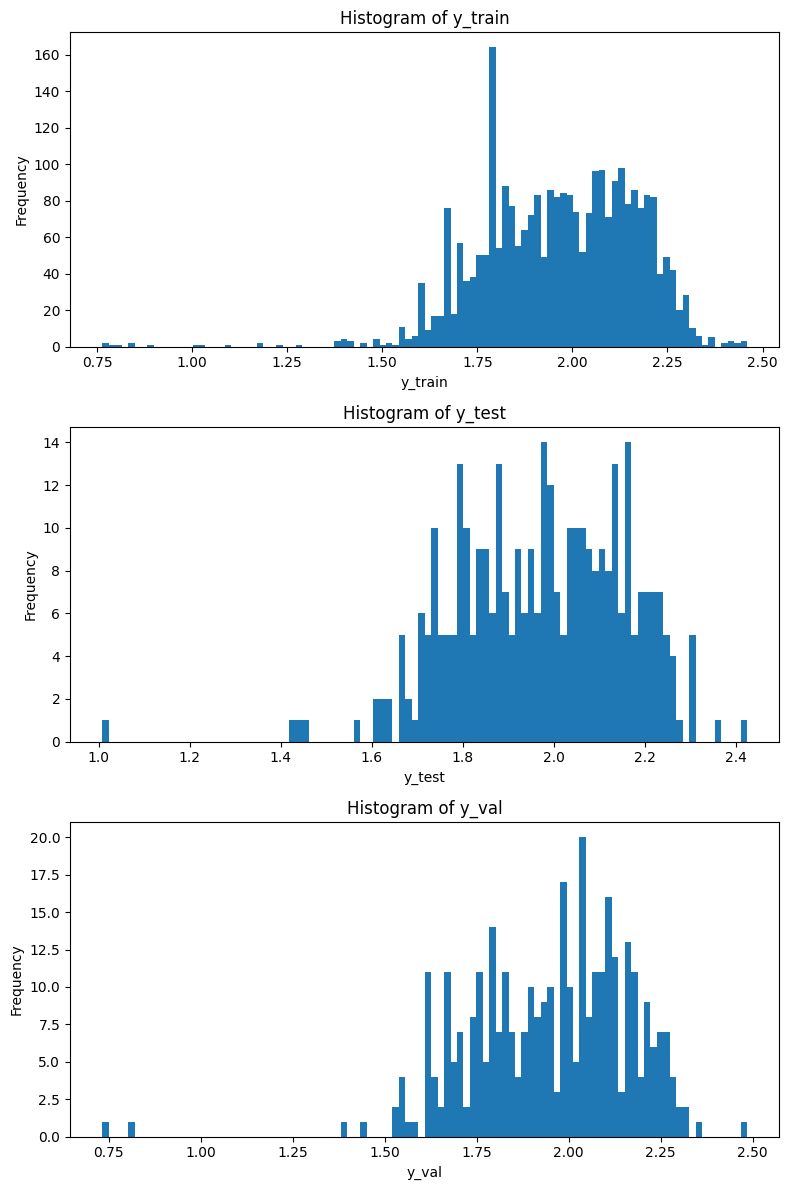

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histogram plot for y_train
axs[0].hist(y_train, bins=100)
axs[0].set_xlabel('y_train')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of y_train')

# Histogram plot for y_test
axs[1].hist(y_test, bins=100)
axs[1].set_xlabel('y_test')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of y_test')

# Histogram plot for y_val
axs[2].hist(y_val, bins=100)
axs[2].set_xlabel('y_val')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of y_val')

plt.tight_layout()
plt.show()

### **Improved visualization**

<ipython-input-106-2d6480418e09>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


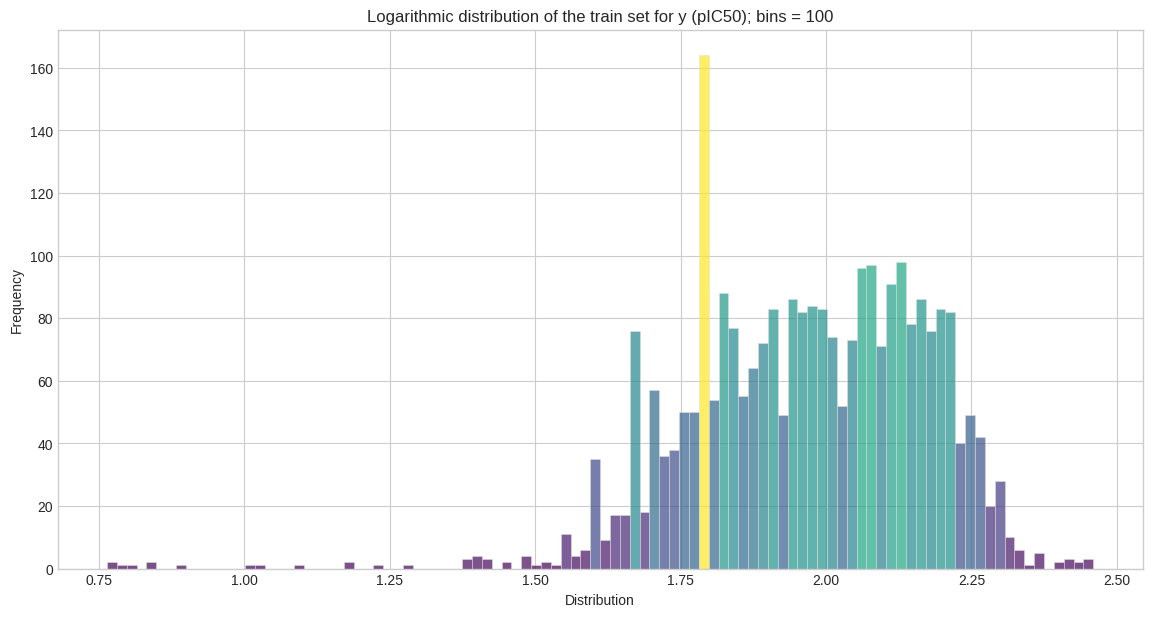

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(y_train, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int')

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('Logarithmic distribution of the train set for y (pIC50); bins = 100', fontsize=12)
plt.xlabel('Distribution', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

<ipython-input-107-1dfe0b9ca1e0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


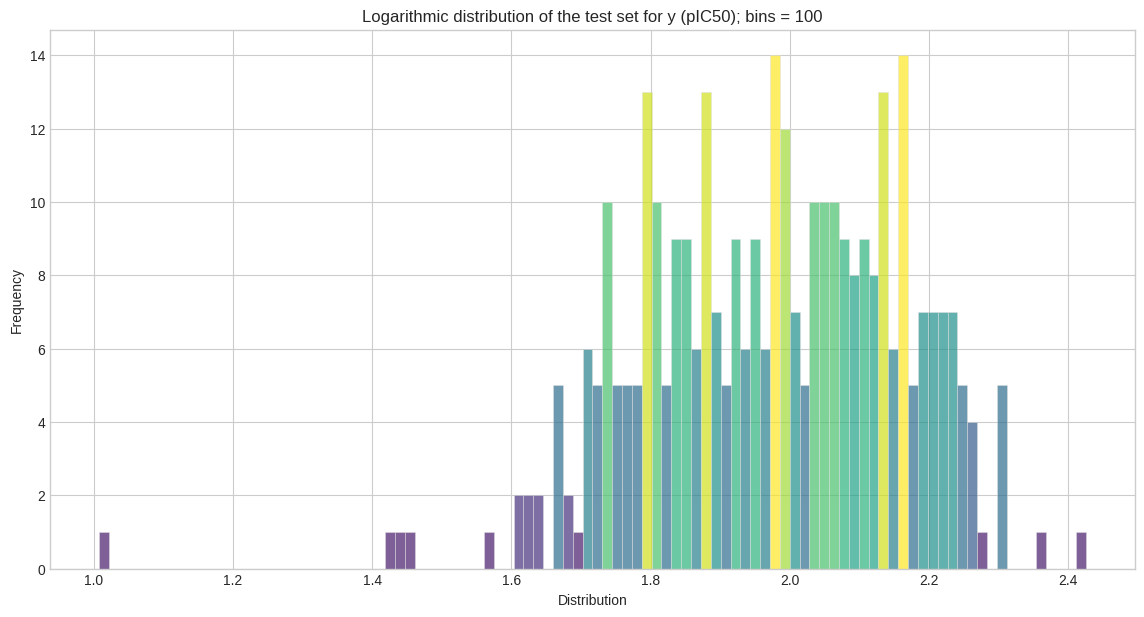

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(y_test, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int')

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('Logarithmic distribution of the test set for y (pIC50); bins = 100', fontsize=12)
plt.xlabel('Distribution', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

<ipython-input-108-7efece8fb29f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


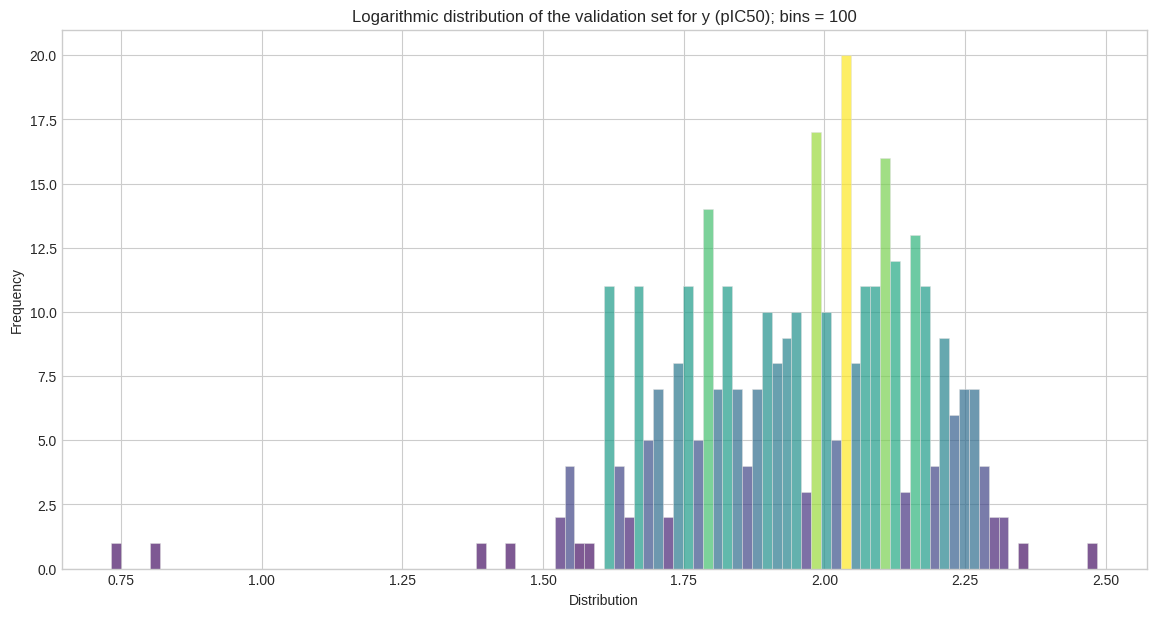

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(y_val, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int')

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('Logarithmic distribution of the validation set for y (pIC50); bins = 100', fontsize=12)
plt.xlabel('Distribution', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

## **Lazy Predict**

- initial analysis ung LazyRegressor

In [ ]:
! pip install lazypredict
! pip install joblib

In [ ]:
from lazypredict.Supervised import LazyRegressor
from joblib import parallel_backend

# initial model analysis/selection using LazyRegressor
with parallel_backend('multiprocessing', n_jobs=200):
  lazy_reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
  models, predictions = lazy_reg.fit(x_train, x_test, y_train, y_test)

 76%|███████▌  | 32/42 [07:34<02:12, 13.24s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [10:27<00:16, 16.61s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36939
[LightGBM] [Info] Number of data points in the train set: 2767, number of used features: 338
[LightGBM] [Info] Start training from score 1.966027


100%|██████████| 42/42 [10:42<00:00, 15.31s/it]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,174999838350891215224832.00,-8092478074029651001344.00,16707150473.26,18.49
Lars,2025717437151.45,-93674794780.52,56842.48,14.26
SGDRegressor,816491331451.33,-37756824574.74,36087.71,14.49
KernelRidge,2463.75,-112.88,1.98,12.49
GaussianProcessRegressor,2223.01,-101.75,1.88,13.45
MLPRegressor,57.20,-1.60,0.30,16.44
DecisionTreeRegressor,29.52,-0.32,0.21,9.35
ExtraTreeRegressor,24.28,-0.08,0.19,7.97
LassoLars,22.65,-0.00,0.19,13.69


In [ ]:
r2_column = 'R-Squared'

top_10_r2_values = models.nlargest(10, columns=r2_column)

if not top_10_r2_values.empty:
    print(f"The top 10 R2 values for test scores '{r2_column}' are in the following:")
    print(top_10_r2_values)
else:
    print(f"No rows contain the top 10 R2 values in column '{r2_column}'.")

The top 10 R2 values for test scores 'R-Squared' are in the following:
                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
NuSVR                                8.08       0.67  0.11       15.80
SVR                                  9.05       0.63  0.11       15.12
RandomForestRegressor               10.90       0.54  0.13       44.79
ExtraTreesRegressor                 11.13       0.53  0.13       21.94
BayesianRidge                       11.36       0.52  0.13        7.53
ElasticNetCV                        11.46       0.52  0.13       18.79
LassoCV                             11.46       0.52  0.13       29.44
PoissonRegressor                    11.93       0.49  0.13       14.34
KNeighborsRegressor                 12.00       0.49  0.13        9.55
HuberRegressor                      12.07       0.49  0.13        9.92


# **Model Building (NuSVR)**

## **Base NuSVR**

In [ ]:
from joblib import parallel_backend

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.svm import NuSVR

base_nusvr = NuSVR()

with parallel_backend('multiprocessing', n_jobs=200):
  base_nusvr.fit(x_train, y_train)

In [ ]:
from joblib import dump

dump(base_nusvr, '/content/drive/MyDrive/ml_models/base_nusvr.joblib')

['/content/drive/MyDrive/ml_models/base_nusvr.joblib']

### **Test performance**

- Base NuSVR

In [ ]:
print(base_nusvr.score(x_test, y_test))

0.6729779195436054


In [ ]:
y_test_pred = base_nusvr.predict(x_test)

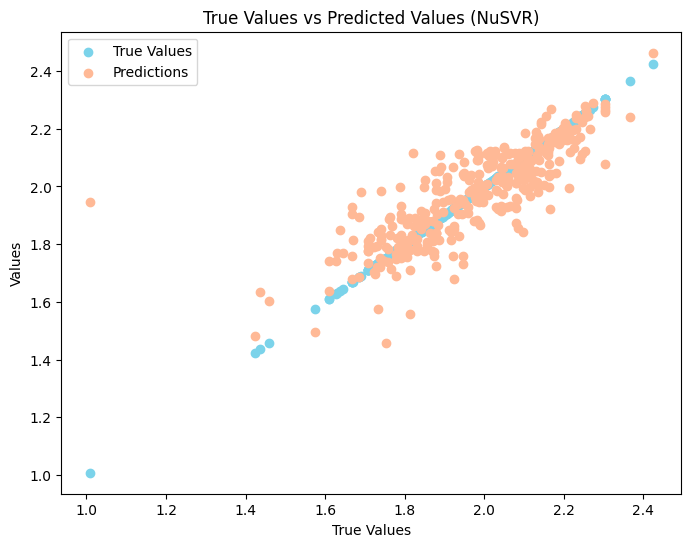

In [ ]:
# Plot y_test_true vs y_test_pred
plt.figure(figsize=(8, 6))

# Plot true values in blue
plt.scatter(y_test, y_test, color='#7BD3EA', label='True Values')

# Plot predicted values in orange
plt.scatter(y_test, y_test_pred, color='#FFB996', label='Predictions')

plt.xlabel('True Values')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values (NuSVR)')
plt.legend()
plt.show()

### **Improved visualization**

In [ ]:
from joblib import load

# load base_nusvr
loaded_base_nusvr = load('/content/drive/MyDrive/ml_models/base_nusvr.joblib')

In [ ]:
y_test_pred = loaded_base_nusvr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))


0.6729779195436054
0.011279771809834952
0.10620627010602976


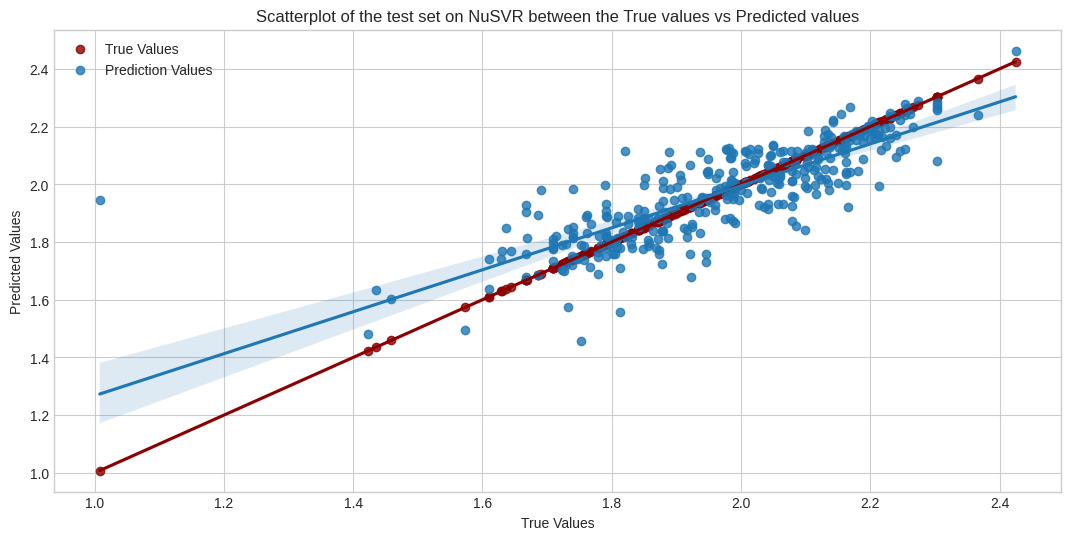

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))

sns.regplot(x=y_test, y=y_test, color='darkred', label='True Values')
sns.regplot(x=y_test, y=y_test_pred, label='Prediction Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
title = 'Scatterplot of the test set on NuSVR between the True values vs Predicted values'
plt.title(title)
plt.legend()
plt.savefig(title, dpi=200)
plt.show()

In [ ]:
# Pearson product-moment correlation coefficients
cor = np.corrcoef(y_test, y_test_pred)[0][1]

# Means
mean_true = np.mean(y_test)
mean_pred = np.mean(y_test_pred)

# Population variances
var_true = np.var(y_test)
var_pred = np.var(y_test_pred)

# Population standard deviations
sd_true = np.std(y_test)
sd_pred = np.std(y_test_pred)

# Calculate CCC (Concordance Correlation Coefficient)
numerator = 2 * cor * sd_true * sd_pred
denominator = var_true + var_pred + (mean_true - mean_pred)**2
ccc = numerator / denominator

print(ccc)

0.8163964475628784


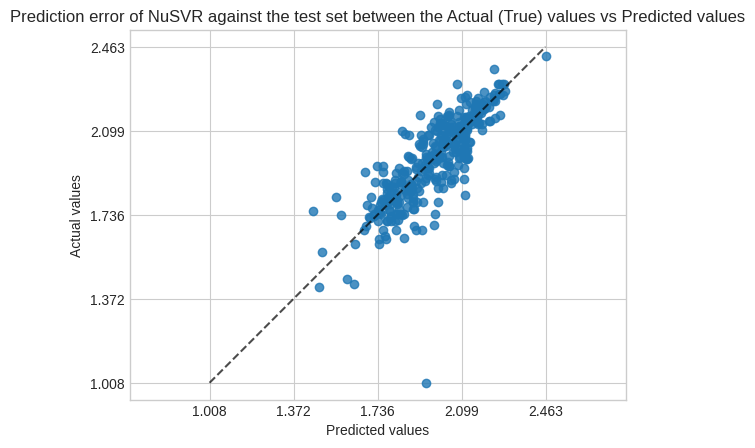

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

disp = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred, kind='actual_vs_predicted')

title = 'Prediction error of NuSVR against the test set between the Actual (True) values vs Predicted values'
plt.title(title)
plt.show()

### **Validation performance**

- Base NuSVR

In [ ]:
y_val_pred = base_nusvr.predict(x_val)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

print(r2_score(y_val, y_val_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_absolute_error(y_val, y_val_pred))
print(mean_absolute_percentage_error(y_val, y_val_pred))

0.5397801773506548
0.022226764450948674
0.09060973243324699
0.053850619482390234


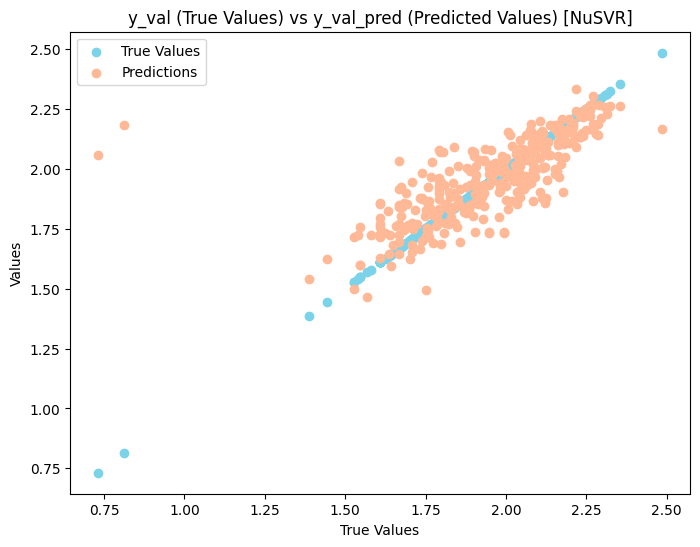

In [ ]:
# Plot y_val (true) vs y_val_pred (prediction)
plt.figure(figsize=(8, 6))

# Plot true values in blue
plt.scatter(y_val, y_val, color='#7BD3EA', label='True Values')

# Plot predicted values in orange
plt.scatter(y_val, y_val_pred, color='#FFB996', label='Predictions')

plt.xlabel('True Values')
plt.ylabel('Values')
plt.title('y_val (True Values) vs y_val_pred (Predicted Values) [NuSVR]')
plt.legend()
plt.show()

### **Improved visualization**

In [ ]:
y_val_pred = loaded_base_nusvr.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_val, y_val_pred))
print(mean_squared_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))


0.5397801773506548
0.022226764450948674
0.14908643281985345


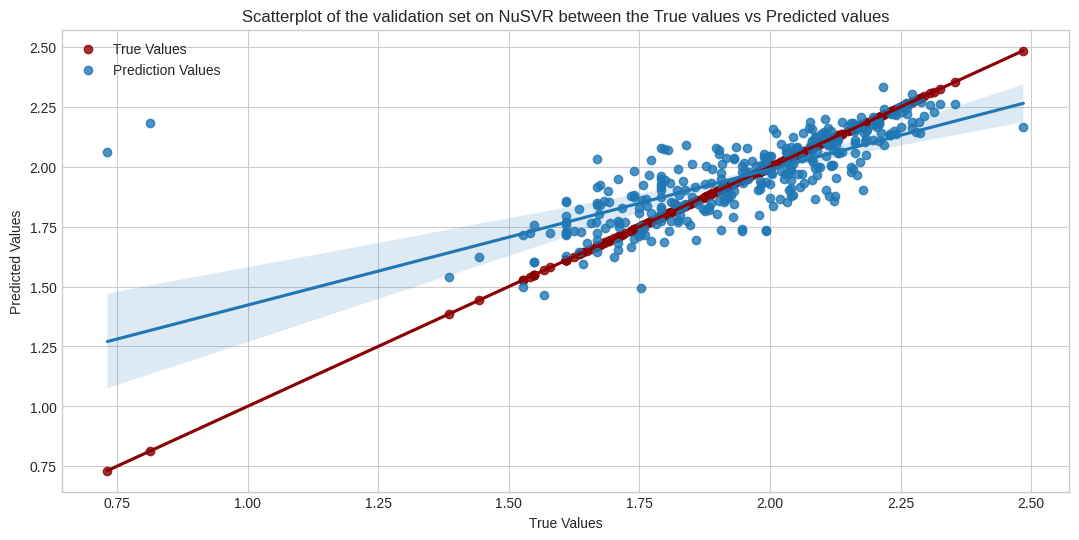

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))

sns.regplot(x=y_val, y=y_val, color='darkred', label='True Values')
sns.regplot(x=y_val, y=y_val_pred, label='Prediction Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
title = 'Scatterplot of the validation set on NuSVR between the True values vs Predicted values'
plt.title(title)
plt.legend()
plt.savefig(title, dpi=200)
plt.show()

In [ ]:
# Pearson product-moment correlation coefficients
cor = np.corrcoef(y_val, y_val_pred)[0][1]

# Means
mean_true = np.mean(y_val)
mean_pred = np.mean(y_val_pred)

# Population variances
var_true = np.var(y_val)
var_pred = np.var(y_val_pred)

# Population standard deviations
sd_true = np.std(y_val)
sd_pred = np.std(y_val_pred)

# Calculate CCC (Concordance Correlation Coefficient)
numerator = 2 * cor * sd_true * sd_pred
denominator = var_true + var_pred + (mean_true - mean_pred)**2
ccc = numerator / denominator

print(ccc)

0.7113778625840093


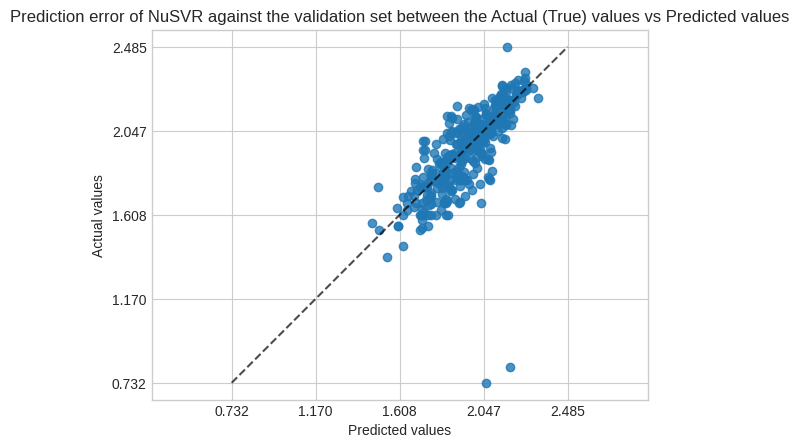

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

disp = PredictionErrorDisplay.from_predictions(y_true=y_val, y_pred=y_val_pred, kind='actual_vs_predicted')

title = 'Prediction error of NuSVR against the validation set between the Actual (True) values vs Predicted values'
plt.title(title)
plt.show()

# **External Validation**

In [ ]:
ext_val_for_ml = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/ext_val_final_for_ml.csv')

<ipython-input-68-c3b2eed3fb7f>:1: DtypeWarning: Columns (146,147,155,156,173,174,182,183,191,192,200,201,209,210,218,219,227,228,236,237,353,354,362,363,371,372,389,390,398,399,407,408,416,417,425,426,434,435,443,444,452,453,460,461,468,469,476,477,492,493,500,501,508,509,516,517,524,525,532,533,540,541,548,549,556,557,564,565,572,573,588,589,596,597,604,605,612,613,620,621,628,629,636,637,644,645,1106,1111,1185,1190,1577,1800) have mixed types. Specify dtype option on import or set low_memory=False.
  ext_val_for_ml = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/ext_val_final_for_ml.csv')


In [ ]:
ext_val_for_ml

,molecule_chembl_id,canonical_smiles,standard_value,document_chembl_id,pIC50,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,157,158,159,160,161,162,163,164,165,166
0,CHEMBL84808,Nc1ccc2c(c1)C(=O)/C(=C/c1cc(Cl)c(O)c(Cl)c1)C2=O,5.000000e-06,CHEMBL1130961,5.301030,17.343821,14.586372,0,0,27.826361458392796,...,1,1,1,0,1,1,1,1,1,0
1,CHEMBL84807,Nc1ccc2c(c1)C(=O)/C(=C/c1cc(Br)c(O)c(Br)c1)C2=O,8.000000e-06,CHEMBL1130961,5.096910,17.343821,14.586372,0,0,27.826361458392796,...,1,1,1,0,1,1,1,1,1,0
2,CHEMBL127929,CCOC(=O)CSc1cnc(NC(C)=O)s1,5.000000e-05,CHEMBL1135763,4.301030,11.641878,10.654974,0,0,19.12342919856929,...,1,1,1,1,1,1,0,1,1,0
3,CHEMBL82560,COc1ccc2c(c1)C(=O)/C(=C/c1cc(Br)c(O)c(Br)c1)C2=O,1.000000e-05,CHEMBL1130961,5.000000,17.941538,15.015960,0,0,29.498829130082953,...,1,0,1,1,0,1,1,1,1,0
4,CHEMBL428690,CN1CC[C@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc...,5.000000e-05,CHEMBL1135763,4.301030,22.212688,17.594624,0,1,35.51570437222049,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,CHEMBL4457566,Cc1cc(C(=O)NC(C)(C)C)cc(C#Cc2ccc3c4c(oc3c2)C(C...,1.000000e-05,CHEMBL5113522,5.000000,33.013024,23.634268,0,0,49.953578498098054,...,0,1,1,1,1,1,1,1,1,0
571,CHEMBL495739,Cl.O=S(=O)(NCCNC/C=C/c1ccc(Br)cc1)c1cccc2cnccc12,5.000000e-08,CHEMBL5131375,7.301030,20.790834,15.359090,0,1,multiple fragments (SpAbs_A/SpAbs),...,0,1,1,0,1,1,1,1,1,1
572,CHEMBL4459800,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccnc(F)c3)cc2)c1,7.900000e-07,CHEMBL5131572,6.102373,20.005839,15.289021,0,0,33.74286967704826,...,1,1,1,1,1,1,1,1,1,0
573,CHEMBL5176687,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccnc(F)c3)nc2)c1,1.750000e-06,CHEMBL5131572,5.756962,20.005839,15.289021,0,0,33.74286967704826,...,1,1,1,1,1,1,1,1,1,0


## **External validation of NuSVR**

In [ ]:
# select only the descriptors that have gone through feature selection

selected_features = df_md_fp_new.columns.tolist()

columns_to_keep = [col for col in df_md_fp_new.columns if col in selected_features]
x_ext = ext_val_for_ml[columns_to_keep]

In [ ]:
x_ext

,ABC,nAcid,nBase,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,nN,nS,...,157,158,159,160,161,162,163,164,165,166
0,17.343821,0,0,3.9149720619092747,180.45631200114934,12,0,0,1,0,...,1,1,1,0,1,1,1,1,1,0
1,17.343821,0,0,3.9149720619092747,180.45631200114934,12,0,0,1,0,...,1,1,1,0,1,1,1,1,1,0
2,11.641878,0,0,3.3362756948848893,121.920645768188,5,0,0,2,2,...,1,1,1,1,1,1,0,1,1,0
3,17.941538,0,0,3.9582847904588805,199.4557315231282,12,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,22.212688,0,1,4.516683247833811,241.3725342235298,16,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,33.013024,0,0,4.358016350774938,6783.255464327051,21,0,0,3,1,...,0,1,1,1,1,1,1,1,1,0
571,20.790834,0,1,multiple fragments (VE1_A/VE1),multiple fragments (VR1_A/VR1),16,0,0,3,1,...,0,1,1,0,1,1,1,1,1,1
572,20.005839,0,0,4.605002633801686,185.1994164429184,18,0,0,2,0,...,1,1,1,1,1,1,1,1,1,0
573,20.005839,0,0,4.605002633801686,185.1994164429184,18,0,0,3,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# coerce all objects to be NaN
x_ext = x_ext.applymap(lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, object) else x)

In [ ]:
y_ext = ext_val_for_ml['pIC50']

In [ ]:
print(x_ext.shape, y_ext.shape)

(575, 362) (575,)


In [ ]:
print(pd.isnull(x_ext).sum().sum())
print(pd.isnull(y_ext).sum().sum())

7874
0


In [ ]:
# impute x_ext
x_ext_imp = imp_mean.fit_transform(x_ext)

In [ ]:
x_ext_imp = pd.DataFrame(x_ext_imp, columns=x_ext.columns, index=x_ext.index)

In [ ]:
print(pd.isnull(x_ext_imp).sum().sum())
print(pd.isnull(y_ext).sum().sum())

0
0


In [ ]:
print(x_ext_imp.shape, y_ext.shape)

(575, 362) (575,)


In [ ]:
# also scale the x and do log-transformation on y
# turn both into a numpy array for consistency

x_ext_scaled = scaler.fit_transform(x_ext_imp)

y_ext_log = np.log1p(y_ext)
y_ext_numpy = y_ext_log.to_numpy()

In [ ]:
print(x_ext_scaled.shape, y_ext_numpy.shape)

(575, 362) (575,)


In [ ]:
from joblib import load

# load base_nusvr
loaded_base_nusvr = load('/content/drive/MyDrive/ml_models/base_nusvr.joblib')

In [ ]:
print(loaded_base_nusvr.score(x_ext_scaled, y_ext_numpy))

-0.21870562430002272


In [ ]:
y_ext_pred = loaded_base_nusvr.predict(x_ext_scaled)

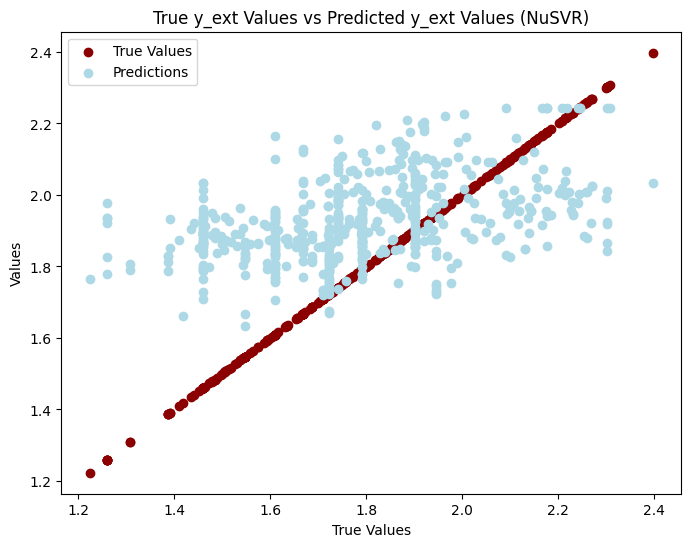

In [ ]:
import matplotlib.pyplot as plt

# Plot y_test_true vs y_test_pred
plt.figure(figsize=(8, 6))

# Plot true values in darkred
plt.scatter(y_ext_numpy, y_ext_numpy, color='darkred', label='True Values')

# Plot predicted values in lightblue
plt.scatter(y_ext_numpy, y_ext_pred, color='lightblue', label='Predictions')

plt.xlabel('True Values')
plt.ylabel('Values')
plt.title('True y_ext Values vs Predicted y_ext Values (NuSVR)')
plt.legend()
plt.show()

### **Statistical measurements**

- actual y values of the external validation set

In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np

y_datasets = [y_ext_numpy]
y_names = ['y_ext_numpy']

for i, data in enumerate(y_datasets):
    mean = np.mean(data)
    median = np.median(data)
    skewness = skew(data)
    kurtosis_val = kurtosis(data)

    print(f'Statistical Measurements of {y_names[i]}:')
    print(f"Mean: {mean}\nMedian: {median}\nSkewness: {skewness}\nKurtosis: {kurtosis_val}\n{'-' * 50}")


Statistical Measurements of y_ext_numpy:
Mean: 1.783522852990707
Median: 1.7803300917305174
Skewness: 0.24140717898396294
Kurtosis: -0.2081252039932595
--------------------------------------------------


<ipython-input-109-4b4987f24d61>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


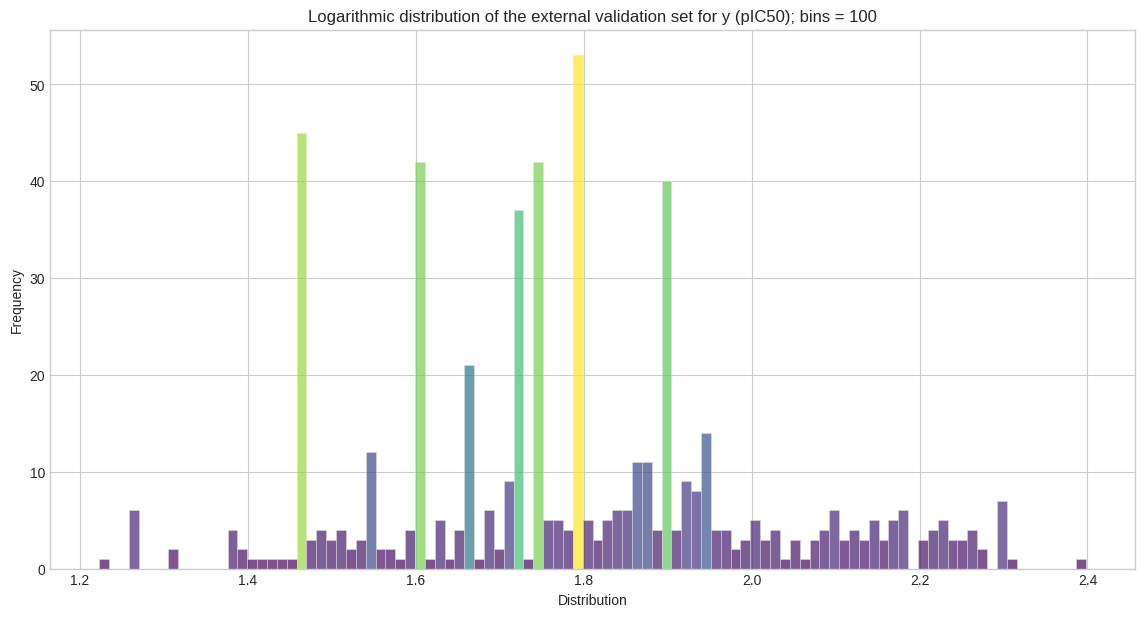

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(y_ext_numpy, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int')

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('Logarithmic distribution of the external validation set for y (pIC50); bins = 100', fontsize=12)
plt.xlabel('Distribution', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

### **Improved visualization**

In [ ]:
y_ext_pred = loaded_base_nusvr.predict(x_ext_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_ext_numpy, y_ext_pred))
print(mean_squared_error(y_ext_numpy, y_ext_pred))
print(np.sqrt(mean_squared_error(y_ext_numpy, y_ext_pred)))


-0.21870562430002272
0.061568883451706934
0.24813077892858623


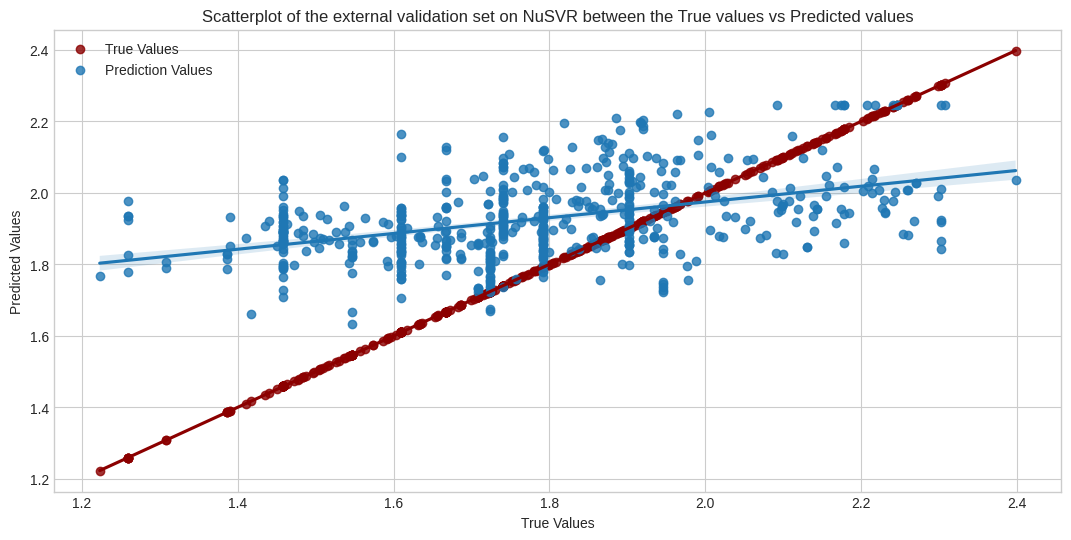

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))

sns.regplot(x=y_ext_numpy, y=y_ext_numpy, color='darkred', label='True Values')
sns.regplot(x=y_ext_numpy, y=y_ext_pred, label='Prediction Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
title = 'Scatterplot of the external validation set on NuSVR between the True values vs Predicted values'
plt.title(title)
plt.legend()
plt.savefig(title, dpi=200)
plt.show()

In [ ]:
# Pearson product-moment correlation coefficients
cor = np.corrcoef(y_ext_numpy, y_ext_pred)[0][1]

# Means
mean_true = np.mean(y_ext_numpy)
mean_pred = np.mean(y_ext_pred)

# Population variances
var_true = np.var(y_ext_numpy)
var_pred = np.var(y_ext_pred)

# Population standard deviations
sd_true = np.std(y_ext_numpy)
sd_pred = np.std(y_ext_pred)

# Calculate CCC (Concordance Correlation Coefficient)
numerator = 2 * cor * sd_true * sd_pred
denominator = var_true + var_pred + (mean_true - mean_pred)**2
ccc = numerator / denominator

print(ccc)

0.2656421184910515


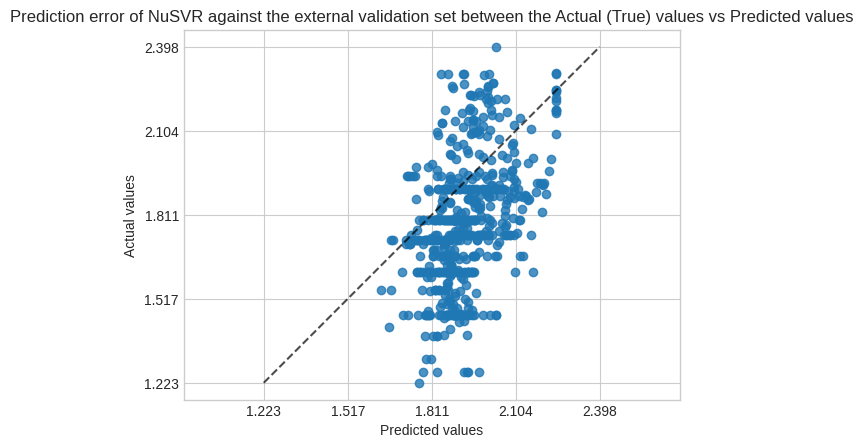

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

disp = PredictionErrorDisplay.from_predictions(y_true=y_ext_numpy, y_pred=y_ext_pred, kind='actual_vs_predicted')

title = 'Prediction error of NuSVR against the external validation set between the Actual (True) values vs Predicted values'
plt.title(title)
plt.show()

# **Feature Importance**

- Permutation Importance on the ROCK1 dataset

In [ ]:
import pandas as pd
import numpy as np

df2 = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/final_dataset_for_ml.csv')

<ipython-input-3-88d516b9e06e>:4: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,150,151,159,160,161,162,163,164,165,166,167,168,177,178,186,187,195,196,204,205,213,214,222,223,231,232,240,241,269,270,271,272,273,274,275,276,277,357,358,366,367,375,376,377,378,379,380,381,382,383,384,393,394,402,403,411,412,420,421,429,430,438,439,447,448,456,457,464,465,472,473,480,481,482,483,484,485,486,487,488,496,497,504,505,512,513,520,521,528,529,536,537,544,545,552,553,560,561,568,569,576,577,578,579,580,581,582,583,584,592,593,600,601,608,609,616,617,624,625,632,633,640,641,648,649,867,875,881,882,883,891,897,898,1110,1115,1133,1189,1194,1212,1581,1582,1804,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Mordred & RDKit files/final_dataset_for_ml.csv')


In [ ]:
df2

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
0,2102,CHEMBL210297,O=C(O)c1ccc2c(c1)nc(-c1ccc(OCc3cc(N4CCCC4=O)cc...,'=',83368118.46,CHEMBL3045038,8.336812e-02,1.079000,inactive,36.871660,...,1,1,1,0,1,1,1,1,1,0
1,3101,CHEMBL2296935,CC(=O)NC(=O)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3n...,'=',71449632.61,CHEMBL3045038,7.144963e-02,1.146000,inactive,36.423773,...,1,1,1,1,1,1,1,1,1,0
2,4101,CHEMBL376688,CN(C)C(=O)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3nc4...,'=',66680676.92,CHEMBL3045038,6.668068e-02,1.176000,inactive,34.900170,...,1,1,1,1,1,1,1,1,1,0
3,5101,CHEMBL374567,CC(=O)N(C)c1ccc(-c2ccc(Cl)cc2)c(COc2ccc(-c3nc4...,'=',62517269.28,CHEMBL3045038,6.251727e-02,1.204000,inactive,35.676226,...,1,1,1,1,1,1,1,1,1,0
4,6101,CHEMBL411712,O=C(O)c1ccc2c(c1)nc(-c1ccc(OCc3cc(C(=O)N4CCCCC...,'=',55590425.73,CHEMBL3045038,5.559043e-02,1.255000,inactive,38.285874,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,966,CHEMBL4763198,COc1cccc([C@@H](C)NC(=O)c2ccc3c(c2)C(C)Oc2cncc...,'=',0.49,CHEMBL4665758,4.900000e-10,9.309804,active,22.005839,...,1,1,1,1,1,1,1,1,1,0
3459,967,CHEMBL3949136,COc1cc(C(=O)NCc2cccc(C(=O)NC3CCN(C)CC3)c2)ccc1...,'=',0.43,CHEMBL3886981,4.300000e-10,9.366532,active,25.622253,...,1,1,1,1,1,1,1,1,1,0
3460,968,CHEMBL3961538,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CN(C)CC4)...,'=',0.39,CHEMBL3886981,3.900000e-10,9.408935,active,28.410240,...,1,1,1,1,1,1,1,1,1,0
3461,969,CHEMBL3902471,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CNCC4)c2)...,'=',0.26,CHEMBL3886981,2.600000e-10,9.585027,active,27.593743,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
rock1_positions_to_drop = list(range(0, 2246))

rock1_df = df2.drop(df2.index[rock1_positions_to_drop])

In [ ]:
rock1_df

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
2246,1102,CHEMBL2023144,O=C(Nc1ccncc1)c1cnccc1-c1ccc(F)cc1,'>',4000000.00,CHEMBL3886847,4.000000e-03,2.397940,inactive,17.068022,...,0,1,0,0,1,1,1,1,1,0
2247,2101,CHEMBL2023145,O=C(Nc1ccncc1)c1cncc(-c2ccc(F)cc2)c1,'>',400000.00,CHEMBL2021814,4.000000e-04,3.397940,inactive,17.108462,...,0,1,0,0,1,1,1,1,1,0
2248,3101,CHEMBL1566648,O=C(Nc1ccncc1)c1cncc(Br)c1,'=',270000.00,CHEMBL3886847,2.700000e-04,3.568636,inactive,12.199155,...,0,1,0,0,1,1,1,1,1,0
2249,4101,CHEMBL17551,Nc1ccc2[nH]ncc2c1,'=',181300.00,CHEMBL2021814,1.813000e-04,3.741602,inactive,7.847124,...,0,1,0,0,1,1,1,0,1,0
2250,5101,CHEMBL2023148,O=C(Nc1ccccc1)Nc1ccc2[nH]ncc2c1,'=',157100.00,CHEMBL2021814,1.571000e-04,3.803824,inactive,14.918192,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,966,CHEMBL4763198,COc1cccc([C@@H](C)NC(=O)c2ccc3c(c2)C(C)Oc2cncc...,'=',0.49,CHEMBL4665758,4.900000e-10,9.309804,active,22.005839,...,1,1,1,1,1,1,1,1,1,0
3459,967,CHEMBL3949136,COc1cc(C(=O)NCc2cccc(C(=O)NC3CCN(C)CC3)c2)ccc1...,'=',0.43,CHEMBL3886981,4.300000e-10,9.366532,active,25.622253,...,1,1,1,1,1,1,1,1,1,0
3460,968,CHEMBL3961538,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CN(C)CC4)...,'=',0.39,CHEMBL3886981,3.900000e-10,9.408935,active,28.410240,...,1,1,1,1,1,1,1,1,1,0
3461,969,CHEMBL3902471,COc1cc(C(=O)NCc2cccc(C(=O)Nc3nc4c(s3)CNCC4)c2)...,'=',0.26,CHEMBL3886981,2.600000e-10,9.585027,active,27.593743,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# select only the descriptors that have gone through feature selection

selected_features = df_md_fp_new.columns.tolist()

columns_to_keep = [col for col in rock1_df.columns if col in selected_features]
x_rock1 = rock1_df[columns_to_keep]

In [ ]:
# coerce all objects in x_rock1 to be NaN
x_rock1 = x_rock1.applymap(lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, object) else x)

In [ ]:
y_rock1 = rock1_df['pIC50']

In [ ]:
print(x_rock1.shape, y_rock1.shape)

(1217, 362) (1217,)


In [ ]:
print(pd.isnull(x_rock1).sum().sum())
print(pd.isnull(y_rock1).sum().sum())

16266
0


In [ ]:
# impute x_rock1
x_rock1_imp = imp_mean.fit_transform(x_rock1)

In [ ]:
x_rock1_imp = pd.DataFrame(x_rock1_imp, columns=x_rock1.columns, index=x_rock1.index)

In [ ]:
print(pd.isnull(x_rock1_imp).sum().sum())
print(pd.isnull(y_rock1).sum().sum())

0
0


In [ ]:
# also scale the x and do log-transformation on y
# turn both into a numpy array for consistency

x_rock1_scaled = scaler.fit_transform(x_rock1_imp)

y_rock1_log = np.log1p(y_rock1)
y_rock1_numpy = y_rock1_log.to_numpy()

In [ ]:
print(x_rock1_scaled.shape, y_rock1_numpy.shape)

(1217, 362) (1217,)


In [ ]:
from joblib import load

# load base_nusvr
load_base_nusvr = load('/content/drive/MyDrive/ml_models/base_nusvr.joblib')

In [ ]:
# based on r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from joblib import parallel_backend

with parallel_backend('multiprocessing', n_jobs=300):
  scoring = ['r2']
  r_multi = permutation_importance(
      load_base_nusvr, x_rock1_scaled, y_rock1_numpy, n_repeats=5, n_jobs=300,
      random_state=42, scoring=scoring)

In [ ]:
from joblib import dump

dump(r_multi, '/content/drive/MyDrive/ml_models/r_multi.joblib')

['/content/drive/MyDrive/ml_models/r_multi.joblib']

In [ ]:
r2_importances = r_multi['r2'].importances_mean
r2_indices_sorted = r2_importances.argsort()[::-1]

In [ ]:
top_descriptors = 25

top_descriptors_names = [x_rock1_imp.columns[i] for i in r2_indices_sorted[:top_descriptors]]
top_descriptors_scores = [r2_importances[i] for i in r2_indices_sorted[:top_descriptors]]

In [ ]:
print(top_descriptors_names)
print(top_descriptors_scores)

['ATSC1v', '122', '148', 'GATS6s', 'PEOE_VSA11', 'AATSC2Z', 'EState_VSA6', '94', '109', 'NaaN', 'NaaO', 'EState_VSA3', '79', 'EState_VSA7', '65', '52', 'NaaNH', 'AATSC1dv', '124', '69', '117', '62', 'PEOE_VSA13', 'nFaRing', 'PEOE_VSA3']
[0.02832570206613567, 0.025017130927567476, 0.024793906354261975, 0.024785284964311694, 0.022320512124962843, 0.021452345126999138, 0.020335257993291923, 0.015839926762932176, 0.01531371846942442, 0.015200475175870731, 0.015109021900382014, 0.014599263455688627, 0.014585113454756327, 0.014462444694274868, 0.01396582237464592, 0.013615991227691726, 0.012992773698102412, 0.01297807638898687, 0.012709990582162423, 0.012645568144615371, 0.012100236305736844, 0.01169509945719167, 0.01163580219274929, 0.011531502687889073, 0.011177462253377657]


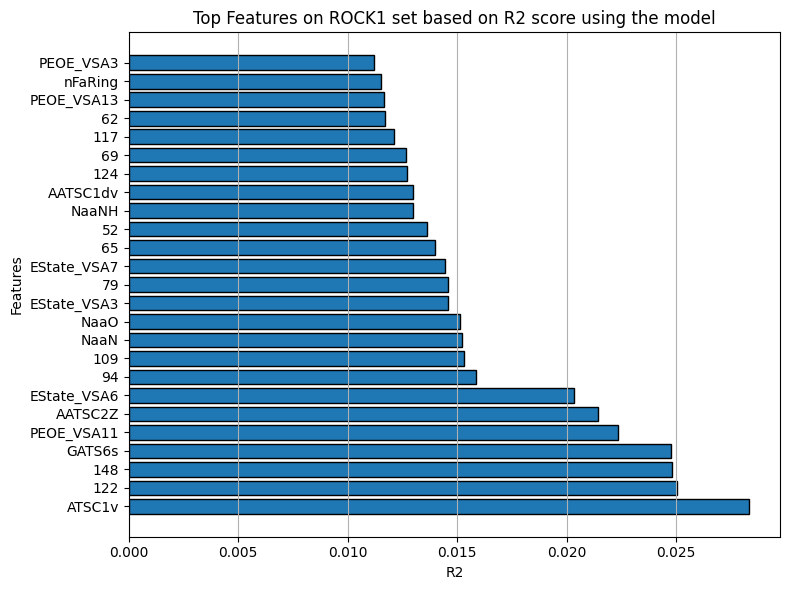

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(top_descriptors_names, top_descriptors_scores, edgecolor='black')
plt.xlabel('R2')
plt.ylabel('Features')
plt.title('Top Features on ROCK1 set based on R2 score using the model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# **Compound Extraction**


In [ ]:
import pandas as pd

def filter_all_non_zero_observations(dataframe, descriptors):

    filtered_df = dataframe[descriptors][(dataframe[descriptors] != 0).all(axis=1)]

    return filtered_df

In [ ]:
selected_keys = ['122', '148', '94', '109', '79', '65', '52', '124', '69', '117', '62']

In [ ]:
filtered_observations = filter_all_non_zero_observations(x_rock1_imp, selected_keys)

print(filtered_observations)

      122  148   94  109   79   65   52  124   69  117   62
2353  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2380  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2397  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2513  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2519  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2626  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2677  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2889  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2954  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2982  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2988  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2989  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3042  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3076  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3097  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3136  1.0  1.0  1.0  1.0  1.0  1.0  1.0 

## **Compounds of Interest**

In [ ]:
index_number = filtered_observations.index

selected_row = df2.iloc[index_number]

selected_row

,Unnamed: 0,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ABC,...,157,158,159,160,161,162,163,164,165,166
2353,2410,CHEMBL1765744,CC[C@@H]1CO[C@H](C(=O)NC2CCCCC2)CN1c1cc(-c2ccc...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,27.553303,...,1,1,1,1,1,1,1,1,1,0
2380,5110,CHEMBL1765731,Nc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2CCO[C@@H](C(=O...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,25.581813,...,1,1,1,0,1,1,1,1,1,0
2397,6810,CHEMBL1765743,CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,26.955586,...,1,1,1,1,1,1,1,1,1,0
2513,17,CHEMBL1765742,CC[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc...,'=',3162.28,CHEMBL1765070,3.162280e-06,5.500000,active,27.553303,...,1,1,1,1,1,1,1,1,1,0
2519,23,CHEMBL3666720,COc1cc2nc(-c3cccc(NC(=O)CN4CCOCC4)c3)nc(Nc3ccc...,'>',3000.00,CHEMBL3639077,3.000000e-06,5.522879,active,36.676742,...,1,1,1,1,1,1,1,1,1,0
2626,130,CHEMBL4103214,Cc1n[nH]cc1-c1cc2nc(CN3CCC[C@@H]3CO)[nH]c(=O)c...,'=',1200.00,CHEMBL4033719,1.200000e-06,5.920819,active,19.108462,...,1,1,1,1,1,1,1,1,1,1
2677,184,CHEMBL1614774,Nc1nc(-c2ccc3c(N)[nH]nc3c2)cc(N2CCO[C@H](C(=O)...,'=',794.33,CHEMBL1765070,7.943300e-07,6.099999,active,25.581813,...,1,1,1,0,1,1,1,1,1,0
2889,396,CHEMBL1765741,C[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc3...,'=',158.49,CHEMBL1765070,1.584900e-07,6.799998,active,26.357869,...,1,1,1,1,1,1,1,1,1,0
2954,461,CHEMBL3956456,COc1cc(C(=O)NC(CN2CCOCC2)c2ccccc2)ccc1-c1cn[nH]c1,'=',107.00,CHEMBL3886981,1.070000e-07,6.970616,active,23.282153,...,1,1,1,1,1,1,1,1,1,0
2982,489,CHEMBL1922143,COc1cccc(CNC(=O)c2[nH]c3nc(-c4cn[nH]c4)ccc3c2C...,'=',91.00,CHEMBL1921670,9.100000e-08,7.040959,active,26.070140,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
selected_observations = selected_row.loc[:, 'Molecule.ChEMBL.ID' : 'Bioactivity.Class']

# (df_imp.loc[:, 'Molecule.ChEMBL.ID	':'Bioactivity.Class'].columns, axis=1

In [ ]:
selected_observations

,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class
2353,CHEMBL1765744,CC[C@@H]1CO[C@H](C(=O)NC2CCCCC2)CN1c1cc(-c2ccc...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate
2380,CHEMBL1765731,Nc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2CCO[C@@H](C(=O...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate
2397,CHEMBL1765743,CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate
2513,CHEMBL1765742,CC[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc...,'=',3162.28,CHEMBL1765070,3.162280e-06,5.500000,active
2519,CHEMBL3666720,COc1cc2nc(-c3cccc(NC(=O)CN4CCOCC4)c3)nc(Nc3ccc...,'>',3000.00,CHEMBL3639077,3.000000e-06,5.522879,active
2626,CHEMBL4103214,Cc1n[nH]cc1-c1cc2nc(CN3CCC[C@@H]3CO)[nH]c(=O)c...,'=',1200.00,CHEMBL4033719,1.200000e-06,5.920819,active
2677,CHEMBL1614774,Nc1nc(-c2ccc3c(N)[nH]nc3c2)cc(N2CCO[C@H](C(=O)...,'=',794.33,CHEMBL1765070,7.943300e-07,6.099999,active
2889,CHEMBL1765741,C[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc3...,'=',158.49,CHEMBL1765070,1.584900e-07,6.799998,active
2954,CHEMBL3956456,COc1cc(C(=O)NC(CN2CCOCC2)c2ccccc2)ccc1-c1cn[nH]c1,'=',107.00,CHEMBL3886981,1.070000e-07,6.970616,active
2982,CHEMBL1922143,COc1cccc(CNC(=O)c2[nH]c3nc(-c4cn[nH]c4)ccc3c2C...,'=',91.00,CHEMBL1921670,9.100000e-08,7.040959,active


In [ ]:
# select only the descriptors that have gone through feature selection

selected_features = df_md_fp_new.columns.tolist()

columns_to_keep = [col for col in rock1_df.columns if col in selected_features]
x_rock1 = rock1_df[columns_to_keep]

In [ ]:
selected_rows_with_selected_features = top_descriptors_names

features_to_keep = [col for col in selected_row.columns if col in selected_rows_with_selected_features]

features_of_interest = selected_row[features_to_keep]

In [ ]:
features_of_interest

,ATSC1v,AATSC1dv,AATSC2Z,GATS6s,NaaNH,NaaN,NaaO,PEOE_VSA3,PEOE_VSA11,PEOE_VSA13,...,62,65,69,79,94,109,117,122,124,148
2353,88.658452,1.402261,0.461481,1.374228,1,3,0,4.983979,11.921829,5.907180,...,1,1,1,1,1,1,1,1,1,1
2380,173.893236,0.911050,0.195806,1.389201,1,3,0,4.983979,11.921829,5.907180,...,1,1,1,1,1,1,1,1,1,1
2397,89.152043,1.395133,0.508066,1.369111,1,3,0,4.983979,11.921829,5.907180,...,1,1,1,1,1,1,1,1,1,1
2513,93.958537,1.265163,0.497350,1.12817,1,3,0,4.983979,11.921829,5.907180,...,1,1,1,1,1,1,1,1,1,1
2519,-30.860302,1.154308,-0.064979,1.409275,1,3,0,9.967957,17.323428,0.000000,...,1,1,1,1,1,1,1,1,1,1
2626,-46.711828,1.301327,0.653402,missing intrinsic state for ['Cl'] (ATS0s/Props),2,2,0,4.983979,0.000000,5.559267,...,1,1,1,1,1,1,1,1,1,1
2677,173.893236,0.911050,0.195806,1.3962891549730683,1,3,0,4.983979,6.103966,5.907180,...,1,1,1,1,1,1,1,1,1,1
2889,171.814364,1.078380,0.493451,1.2277474260435928,1,3,0,4.983979,11.921829,5.907180,...,1,1,1,1,1,1,1,1,1,1
2954,-6.672503,0.846074,-0.549620,1.2348676855210372,1,1,0,0.000000,0.000000,5.907180,...,1,1,1,1,1,1,1,1,1,1
2982,12.560462,1.015873,-0.192661,1.4429210108525066,2,2,0,4.983979,0.000000,5.907180,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
compounds_of_interest = pd.concat([selected_observations, features_of_interest], axis=1)

### **Compounds**

In [ ]:
compounds_of_interest

,Molecule.ChEMBL.ID,Smiles,Standard.Relation,Standard.Value,Document.ChEMBL.ID,Molar,pIC50,Bioactivity.Class,ATSC1v,AATSC1dv,...,62,65,69,79,94,109,117,122,124,148
2353,CHEMBL1765744,CC[C@@H]1CO[C@H](C(=O)NC2CCCCC2)CN1c1cc(-c2ccc...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,88.658452,1.402261,...,1,1,1,1,1,1,1,1,1,1
2380,CHEMBL1765731,Nc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2CCO[C@@H](C(=O...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,173.893236,0.911050,...,1,1,1,1,1,1,1,1,1,1
2397,CHEMBL1765743,CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)...,'>',10000.00,CHEMBL1765070,1.000000e-05,5.000000,intermediate,89.152043,1.395133,...,1,1,1,1,1,1,1,1,1,1
2513,CHEMBL1765742,CC[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc...,'=',3162.28,CHEMBL1765070,3.162280e-06,5.500000,active,93.958537,1.265163,...,1,1,1,1,1,1,1,1,1,1
2519,CHEMBL3666720,COc1cc2nc(-c3cccc(NC(=O)CN4CCOCC4)c3)nc(Nc3ccc...,'>',3000.00,CHEMBL3639077,3.000000e-06,5.522879,active,-30.860302,1.154308,...,1,1,1,1,1,1,1,1,1,1
2626,CHEMBL4103214,Cc1n[nH]cc1-c1cc2nc(CN3CCC[C@@H]3CO)[nH]c(=O)c...,'=',1200.00,CHEMBL4033719,1.200000e-06,5.920819,active,-46.711828,1.301327,...,1,1,1,1,1,1,1,1,1,1
2677,CHEMBL1614774,Nc1nc(-c2ccc3c(N)[nH]nc3c2)cc(N2CCO[C@H](C(=O)...,'=',794.33,CHEMBL1765070,7.943300e-07,6.099999,active,173.893236,0.911050,...,1,1,1,1,1,1,1,1,1,1
2889,CHEMBL1765741,C[C@@H]1CO[C@H](C(=O)Nc2ccccc2)CN1c1cc(-c2ccc3...,'=',158.49,CHEMBL1765070,1.584900e-07,6.799998,active,171.814364,1.078380,...,1,1,1,1,1,1,1,1,1,1
2954,CHEMBL3956456,COc1cc(C(=O)NC(CN2CCOCC2)c2ccccc2)ccc1-c1cn[nH]c1,'=',107.00,CHEMBL3886981,1.070000e-07,6.970616,active,-6.672503,0.846074,...,1,1,1,1,1,1,1,1,1,1
2982,CHEMBL1922143,COc1cccc(CNC(=O)c2[nH]c3nc(-c4cn[nH]c4)ccc3c2C...,'=',91.00,CHEMBL1921670,9.100000e-08,7.040959,active,12.560462,1.015873,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
compounds_of_interest.to_csv('/content/drive/MyDrive/Thesis Files (2023)/compounds_of_interest.csv', index=False)